In [1]:
import torch
import os
import umap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

c:\Users\hqhz1\anaconda3\envs\datathon\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
os.getcwd()

'd:\\Datathon\\eda'

## V1

In [3]:
# read mean and std
stats_dict = torch.load(r'../checkpoints/golf_pose_stats (1).pt', map_location='cpu', weights_only=False)
mean = stats_dict['mean']
std = stats_dict['std']
# these mean and std are from good golfer videos

In [4]:
stats_dict

{'mean': array([ 1.0183948e+00, -3.8601368e+01,  6.8068653e-01,  1.5503334e+01,
         6.7433441e-01,  1.5275264e+02,  1.5475172e+02,  1.4593625e-01,
         1.3681539e+01,  1.3808455e-01,  9.8618231e+00,  1.5450618e+02,
         1.9031827e-01,  2.4089769e+01,  1.8223195e-01,  1.1333054e+01,
         1.6569606e+02,  2.1725133e-01,  2.4162851e+01,  2.1391952e-01,
         1.7979210e+01,  2.3143490e+01,  2.4332292e-01,  2.6678577e+01,
         1.1512255e+01,  2.4127921e-01,  1.7990507e+01, -3.8784134e+01,
         1.5280826e+02,  1.5472734e+02,  2.4158102e-01,  1.1519959e+01,
         2.4859963e-01, -9.4674400e+01,  1.6567030e+02,  1.5477588e+02,
         2.8471553e-01,  2.9923591e-01,  2.7678955e-01, -9.9026260e+01],
       dtype=float32),
 'std': array([  1.5291673 ,  68.966545  ,   0.25704148, 176.7779    ,
          0.25132477,  16.309172  ,  17.088194  ,   1.8562169 ,
         55.530563  ,   1.7779636 ,  44.62118   ,  18.064688  ,
          1.8758475 ,  75.675545  ,   1.7705892 ,

### Norm 2

In [5]:
# test band 1-2
def test_band_norm(path):
	stats_dict_1_2 = torch.load(path, map_location='cpu', weights_only=False)
	z_1_2 = (stats_dict_1_2 - mean) / std
	return np.linalg.norm(z_1_2)
	# print('z_1_2:', np.linalg.norm(z_1_2))

# test_band_norm(r'../test\TDTU-Golf-Pose-v1_features\Public Test\Trong nhà - Indoor\Band 6-8\Side-6016-4_fix_crop.pt')

In [11]:
IN_DIR = '../test/TDTU-Golf-Pose-v1_40ft'

videos = []
score = []

for root, _, files in os.walk(IN_DIR):
	for fname in files:
		in_path = os.path.join(root, fname)
		rel_path = os.path.relpath(in_path, IN_DIR)
		videos.append(rel_path)
		score.append(test_band_norm(in_path))

df = pd.DataFrame({'video': videos, 'score': score, 'band': ''})
df.loc[df['video'].str.contains('8-10'), 'band'] = '8-10'
df.loc[df['video'].str.contains('6-8'), 'band'] = '6-8'
df.loc[df['video'].str.contains('4-6'), 'band'] = '4-6'
df.loc[df['video'].str.contains('2-4'), 'band'] = '2-4'
df.loc[df['video'].str.contains('1-2'), 'band'] = '1-2'


Text(0.5, 1.0, 'Band Score Distribution (by norm)')

<Figure size 1000x600 with 0 Axes>

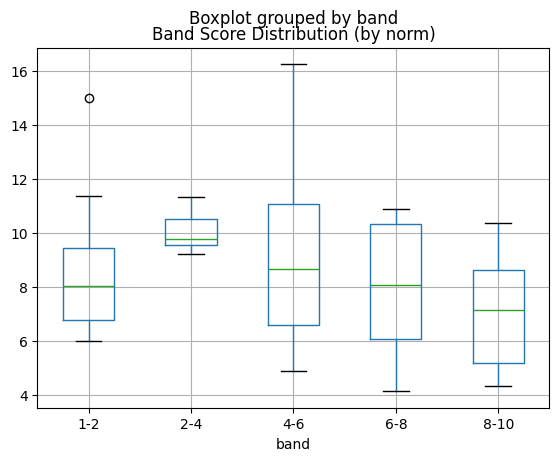

In [12]:
plt.figure(figsize=(10,6))
df.boxplot(column='score', by='band')
plt.title('Band Score Distribution (by norm)')

### Cosin

In [13]:
def test_band_angle(path):
	stats_dict_1_2 = torch.load(path, map_location='cpu', weights_only=False)
	return np.dot(stats_dict_1_2, mean) / (np.linalg.norm(stats_dict_1_2) * np.linalg.norm(mean) + 1e-8)
	# print('angle_1_2:', np.linalg.norm(angle_1_2))

In [14]:
videos = []
score = []

for root, _, files in os.walk(IN_DIR):
	for fname in files:
		in_path = os.path.join(root, fname)
		rel_path = os.path.relpath(in_path, IN_DIR)
		videos.append(rel_path)
		score.append(test_band_angle(in_path))

df_angle = pd.DataFrame({'video': videos, 'score': score, 'band': ''})
df_angle.loc[df_angle['video'].str.contains('8-10'), 'band'] = '8-10'
df_angle.loc[df_angle['video'].str.contains('6-8'), 'band'] = '6-8'
df_angle.loc[df_angle['video'].str.contains('4-6'), 'band'] = '4-6'
df_angle.loc[df_angle['video'].str.contains('2-4'), 'band'] = '2-4'
df_angle.loc[df_angle['video'].str.contains('1-2'), 'band'] = '1-2'

In [15]:
df_angle

,video,score,band
0,Public Test\Ngoài trời - Outdoor\Band 1-2\Back...,0.750783,1-2
1,Public Test\Ngoài trời - Outdoor\Band 1-2\Back...,0.790128,1-2
2,Public Test\Ngoài trời - Outdoor\Band 1-2\Side...,0.806538,1-2
3,Public Test\Ngoài trời - Outdoor\Band 1-2\Side...,0.708314,1-2
4,Public Test\Ngoài trời - Outdoor\Band 2-4\Back...,0.695148,2-4
5,Public Test\Ngoài trời - Outdoor\Band 2-4\Back...,0.711341,2-4
6,Public Test\Ngoài trời - Outdoor\Band 2-4\Side...,0.653410,2-4
7,Public Test\Ngoài trời - Outdoor\Band 2-4\Side...,0.668550,2-4
8,Public Test\Ngoài trời - Outdoor\Band 4-6\Back...,0.626605,4-6
9,Public Test\Ngoài trời - Outdoor\Band 4-6\Back...,0.614875,4-6


Text(0.5, 1.0, 'Band Score Distribution (by cosin)')

<Figure size 1000x600 with 0 Axes>

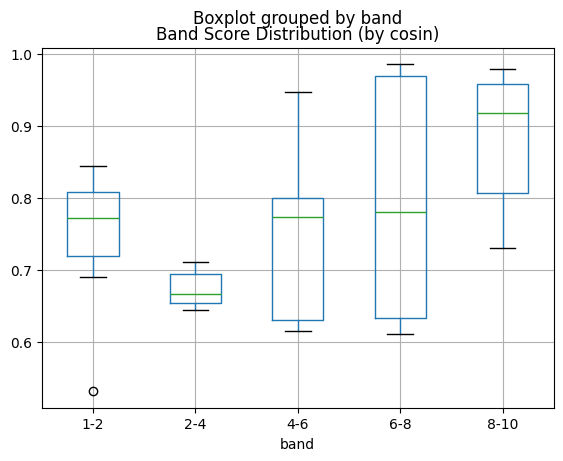

In [16]:
plt.figure(figsize=(10,6))
df_angle.boxplot(column='score', by='band')
plt.title('Band Score Distribution (by cosin)')

### KNN neighboor

In [17]:
df = stats_dict['table']
df = (df - mean) / std

In [18]:
from sklearn.neighbors import NearestNeighbors

def test_band_knn(path, k=50):
	x = torch.load(path, map_location='cpu', weights_only=False)
	x = (x - mean) / std
	knn = NearestNeighbors(n_neighbors=k, metric='euclidean')
	knn.fit(df)
	all_distances, _ = knn.kneighbors(df)
	ave_distance = np.mean(all_distances)

	# print(ave_distance)
	# return
	
	x_distances, _ = knn.kneighbors(x.reshape(1, -1))
	x_ave_distance = np.mean(x_distances)

	score_percentile = np.sum(all_distances >= x_ave_distance) / len(all_distances) * 10

	return score_percentile

# test_band_knn(r'../test\TDTU-Golf-Pose-v1_features\Public Test\Trong nhà - Indoor\Band 6-8\Side-6016-4_fix_crop.pt')

In [19]:
videos = []
score = []

k = 70

for root, _, files in os.walk(IN_DIR):
	for fname in files:
		in_path = os.path.join(root, fname)
		rel_path = os.path.relpath(in_path, IN_DIR)
		videos.append(rel_path)
		score.append(test_band_knn(in_path, k=k))

df_knn_euclidean = pd.DataFrame({'video': videos, 'score': score, 'band': ''})
df_knn_euclidean.loc[df_knn_euclidean['video'].str.contains('8-10'), 'band'] = '8-10'
df_knn_euclidean.loc[df_knn_euclidean['video'].str.contains('6-8'), 'band'] = '6-8'
df_knn_euclidean.loc[df_knn_euclidean['video'].str.contains('4-6'), 'band'] = '4-6'
df_knn_euclidean.loc[df_knn_euclidean['video'].str.contains('2-4'), 'band'] = '2-4'
df_knn_euclidean.loc[df_knn_euclidean['video'].str.contains('1-2'), 'band'] = '1-2'

In [20]:
df_knn_euclidean

,video,score,band
0,Public Test\Ngoài trời - Outdoor\Band 1-2\Back...,31.150000,1-2
1,Public Test\Ngoài trời - Outdoor\Band 1-2\Back...,31.600000,1-2
2,Public Test\Ngoài trời - Outdoor\Band 1-2\Side...,50.342857,1-2
3,Public Test\Ngoài trời - Outdoor\Band 1-2\Side...,29.342857,1-2
4,Public Test\Ngoài trời - Outdoor\Band 2-4\Back...,27.728571,2-4
5,Public Test\Ngoài trời - Outdoor\Band 2-4\Back...,20.342857,2-4
6,Public Test\Ngoài trời - Outdoor\Band 2-4\Side...,28.271429,2-4
7,Public Test\Ngoài trời - Outdoor\Band 2-4\Side...,25.414286,2-4
8,Public Test\Ngoài trời - Outdoor\Band 4-6\Back...,13.728571,4-6
9,Public Test\Ngoài trời - Outdoor\Band 4-6\Back...,22.471429,4-6


Text(0.5, 1.0, 'Band Score Distribution (knn euclidean k=70)')

<Figure size 1000x600 with 0 Axes>

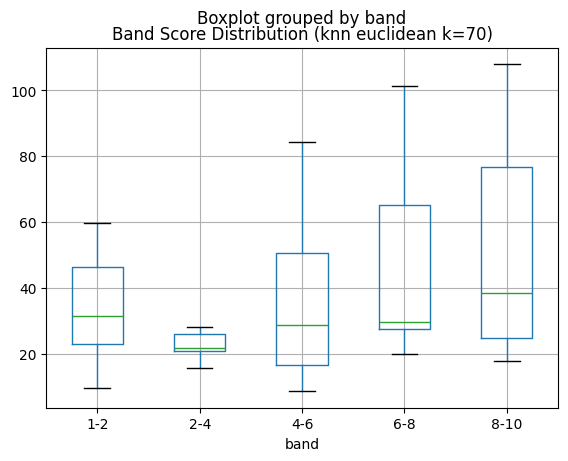

In [21]:
plt.figure(figsize=(10,6))
df_knn_euclidean.boxplot(column='score', by='band')
plt.title(f'Band Score Distribution (knn euclidean k={k})')

### KNN Radius

In [22]:
def test_band_knn_radius(path, r=10):
	x = torch.load(path, map_location='cpu', weights_only=False)
	x = (x - mean) / std
	knn = NearestNeighbors(radius=r, metric='euclidean')
	knn.fit(df)
	
	distances, indices = knn.radius_neighbors(x.reshape(1, -1))
	return len(indices[0])

# print(test_band_knn_radius(r'../test\TDTU-Golf-Pose-v1_features\Public Test\Trong nhà - Indoor\Band 6-8\Side-6016-4_fix_crop.pt'))

In [23]:
videos = []
score = []

r = 7.5

for root, _, files in os.walk(IN_DIR):
	for fname in files:
		in_path = os.path.join(root, fname)
		rel_path = os.path.relpath(in_path, IN_DIR)
		videos.append(rel_path)
		score.append(test_band_knn_radius(in_path, r=r))

df_knn_radius = pd.DataFrame({'video': videos, 'score': score, 'band': ''})
df_knn_radius.loc[df_knn_radius['video'].str.contains('8-10'), 'band'] = '8-10'
df_knn_radius.loc[df_knn_radius['video'].str.contains('6-8'), 'band'] = '6-8'
df_knn_radius.loc[df_knn_radius['video'].str.contains('4-6'), 'band'] = '4-6'
df_knn_radius.loc[df_knn_radius['video'].str.contains('2-4'), 'band'] = '2-4'
df_knn_radius.loc[df_knn_radius['video'].str.contains('1-2'), 'band'] = '1-2'

Text(0.5, 1.0, 'Band Score Distribution (knn radius r=7.5)')

<Figure size 1000x600 with 0 Axes>

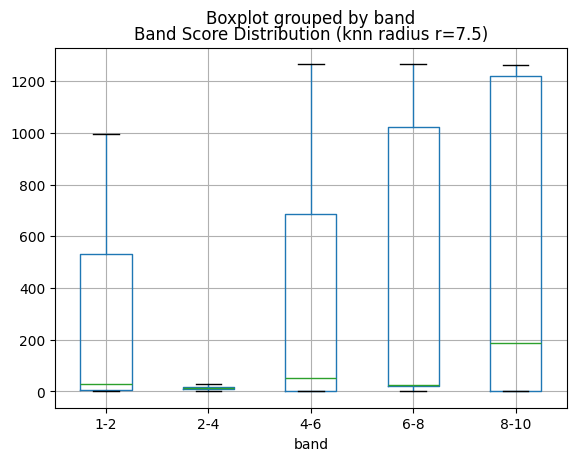

In [24]:
plt.figure(figsize=(10,6))
df_knn_radius.boxplot(column='score', by='band')
plt.title(f'Band Score Distribution (knn radius r={r})')

### Visualize

In [25]:
train_rows = []

for i in range(df.shape[0]):
	train_rows.append({
		'embedding': df[i],   # shape (40,)
		'band': np.nan        # train không có band
	})

train_table = pd.DataFrame(train_rows)

test_rows = []

for root, _, files in os.walk(IN_DIR):
	for fname in files:
		in_path = os.path.join(root, fname)
		rel_path = os.path.relpath(in_path, IN_DIR)

		embedding = torch.load(
			in_path,
			map_location='cpu',
			weights_only=False
		)
		embedding = (embedding - mean) / std
		test_rows.append({
			'embedding': embedding,
			'band': rel_path.split(os.sep)[-2]
		})

test_table = pd.DataFrame(test_rows)

table = pd.concat([train_table, test_table], ignore_index=True)

table


,embedding,band
0,"[2.3891487, 0.9188815, -0.01940224, 0.05645222...",NaN
1,"[2.9048934, 0.84140295, -0.015503286, 0.006972...",NaN
2,"[-0.085957296, 0.04440376, 0.5769269, -0.04141...",NaN
3,"[-0.10952054, 0.19140689, 0.4677152, -0.039462...",NaN
4,"[0.008642936, -1.0503199, -1.2760462, -0.00760...",NaN
...,...,...
1445,"[-0.35954426031537257, 0.5684216546894364, 0.2...",Band 6-8
1446,"[-0.26958147021554224, -0.5609679672170719, -1...",Band 8-10
1447,"[-0.06666180486155408, -1.6452979634126927, -0...",Band 8-10
1448,"[-0.2751936154586126, 0.5948720650333096, 0.40...",Band 8-10


c:\Users\hqhz1\anaconda3\envs\datathon\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


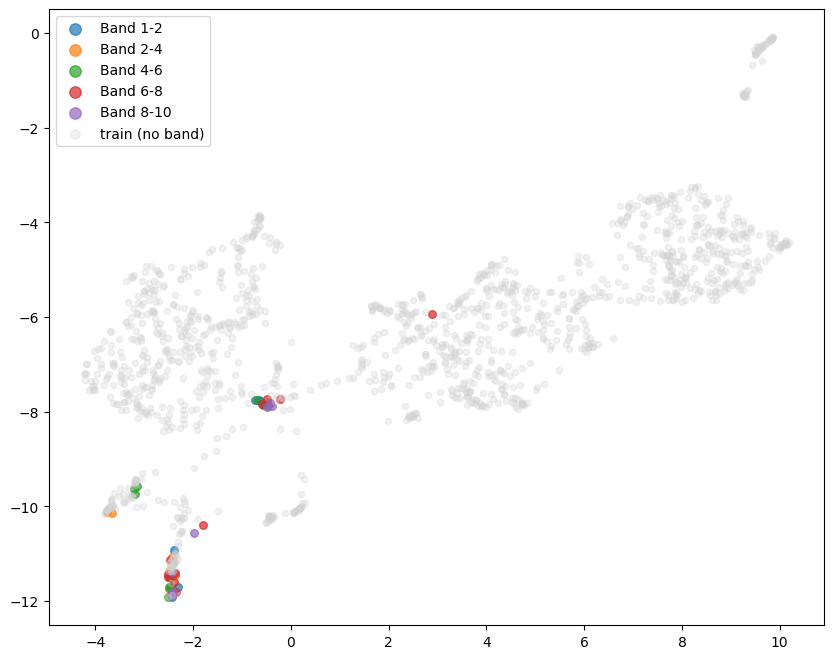

In [26]:
import umap

X = np.stack(table['embedding'].values)

reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X)
table['u1'] = X_umap[:, 0]
table['u2'] = X_umap[:, 1]

bands = table['band'].dropna().unique()

plt.figure(figsize=(10, 8))

for band in bands:
	subset = table[table['band'] == band]
	plt.scatter(
		subset['u1'],
		subset['u2'],
		label=band,
		alpha=0.7,
		s=30
	)

train_subset = table[table['band'].isna()]

plt.scatter(
	train_subset['u1'],
	train_subset['u2'],
	c='lightgray',
	alpha=0.3,
	s=20,
	label='train (no band)'
)

	
plt.legend(markerscale=1.5)
plt.show()


c:\Users\hqhz1\anaconda3\envs\datathon\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


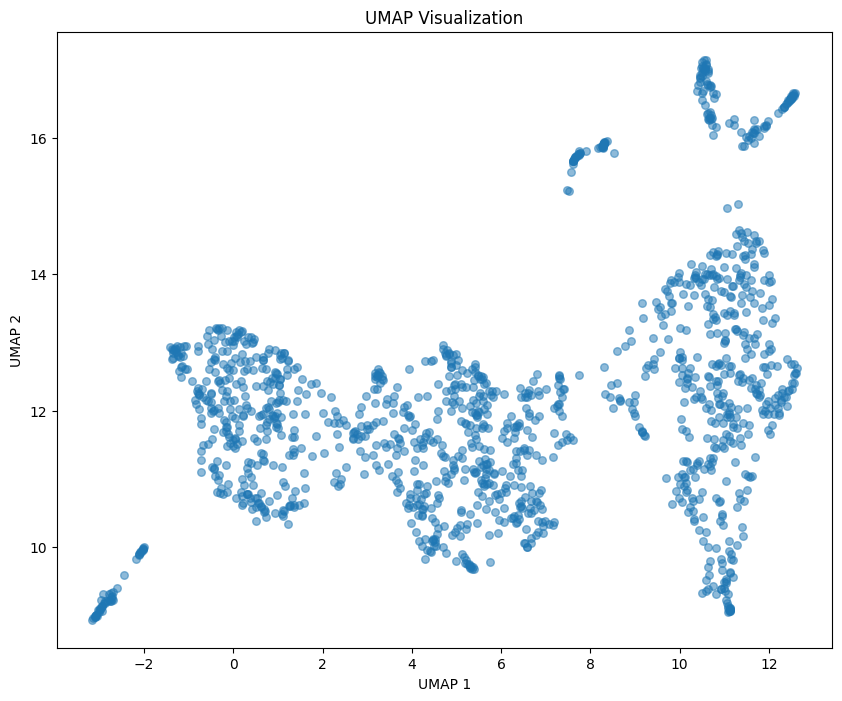

In [27]:
import umap

reducer = umap.UMAP(n_components=2, random_state=42)
embedding = reducer.fit_transform(df)

plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], alpha=0.5, s=30)
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('UMAP Visualization')
plt.show()

## V2


In [28]:
stats_dict = torch.load(r'../checkpoints/golf_pose_stats_40ft.pt', map_location='cpu', weights_only=False)
dt = np.array(stats_dict['table'])

mean = dt.mean(axis=0)
std = dt.std(axis=0)
dt = (dt - mean) / (std + 1e-8)

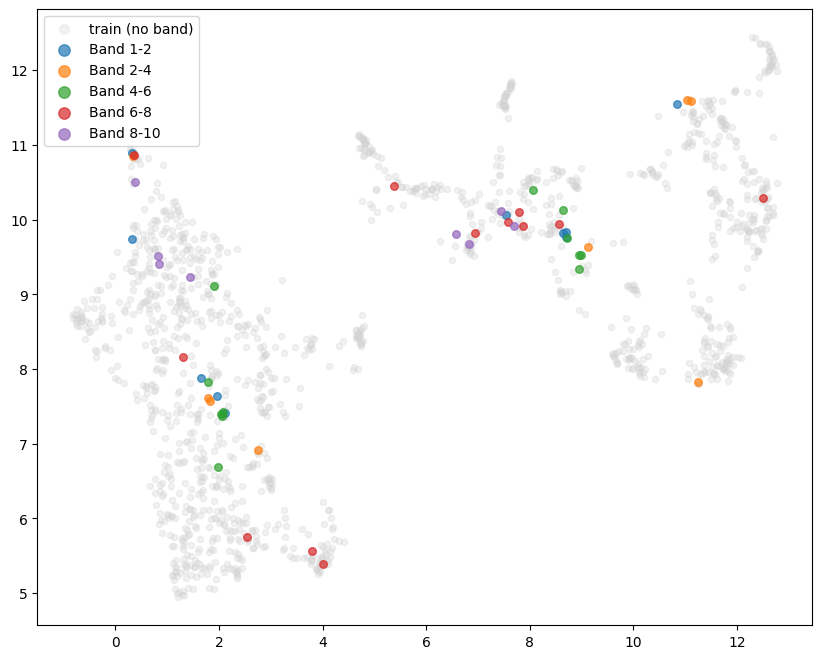

In [34]:
IN_DIR = '../test/TDTU-Golf-Pose-v1_40ft'

train_rows = []

for i in range(dt.shape[0]):
	train_rows.append({
		'embedding': dt[i],   # shape (40,)
		'band': np.nan,        # train không có band
		'place': np.nan,
		'angle': np.nan
	})

train_table = pd.DataFrame(train_rows)
test_rows = []

for root, _, files in os.walk(IN_DIR):
	for fname in files:
		in_path = os.path.join(root, fname)
		rel_path = os.path.relpath(in_path, IN_DIR)

		embedding = torch.load(
			in_path,
			map_location='cpu',
			weights_only=False
		)

		embedding = (embedding - mean) / (std + 1e-8)

		test_rows.append({
			'embedding': embedding,
			'band': rel_path.split(os.sep)[-2],
			'place': rel_path.split(os.sep)[-3],
			'angle': 'back' if 'Backside' in rel_path else 'side'
		})

test_table = pd.DataFrame(test_rows)
table = pd.concat([train_table, test_table], ignore_index=True)

# print(table)

X = np.stack(table['embedding'].values)

reducer = umap.UMAP(n_components=2)
X_umap = reducer.fit_transform(X)
table['u1'] = X_umap[:, 0]
table['u2'] = X_umap[:, 1]

bands = table['band'].dropna().unique()

plt.figure(figsize=(10, 8))

train_subset = table[table['band'].isna()]

plt.scatter(
	train_subset['u1'],
	train_subset['u2'],
	c='lightgray',
	alpha=0.3,
	s=20,
	label='train (no band)'
)
for band in bands:
	subset = table[table['band'] == band]
	plt.scatter(
		subset['u1'],
		subset['u2'],
		label=band,
		alpha=0.7,
		s=30
	)
plt.legend(markerscale=1.5)


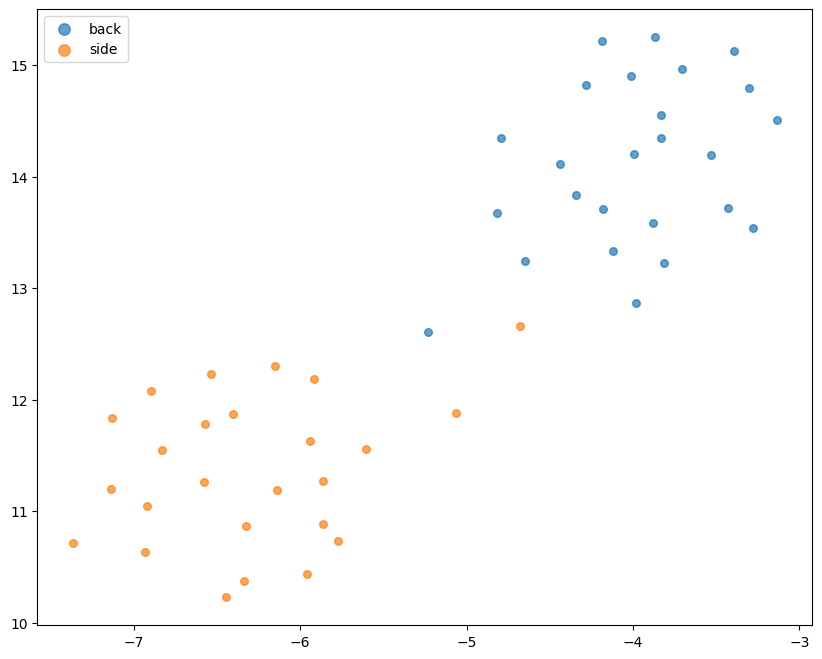

In [35]:
test_subset = test_table.copy()
X = np.stack(test_subset['embedding'].values)
reducer = umap.UMAP(n_components=2)
X_umap = reducer.fit_transform(X)
test_table['u1'] = X_umap[:, 0]
test_table['u2'] = X_umap[:, 1]

bands = test_table['band'].dropna().unique()
places = test_table['place'].dropna().unique()
angles = test_table['angle'].dropna().unique()
plt.figure(figsize=(10, 8))
for angle in angles:
	subset = test_table[test_table['angle'] == angle]
	plt.scatter(
		subset['u1'],
		subset['u2'],
		label=angle,
		alpha=0.7,
		s=30
	)
plt.legend(markerscale=1.5)